In [1]:
import pandas as pd

In [2]:
advertising_data = pd.read_csv('../Data Sets/Advertising.csv')

In [3]:
advertising_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Simple Linear Regression using statsmodels package.

In [4]:
X = advertising_data['TV']

In [5]:
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [6]:
y = advertising_data['sales']

In [7]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [8]:
import statsmodels.api as sm

In [9]:
X = sm.add_constant(X)

In [10]:
X.head()

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [11]:
model = sm.OLS(y, X).fit()

In [12]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           1.47e-42
Time:                        17:50:37   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [13]:
import numpy as np

In [14]:
RSE = np.sqrt(model.ssr / model.df_resid)

In [15]:
RSE

3.2586563686504624

In [16]:
new_tv_budgets = np.array([100, 200, 445, 12, 32])

In [17]:
unseen_X = sm.add_constant(new_tv_budgets)

In [18]:
unseen_X

array([[  1., 100.],
       [  1., 200.],
       [  1., 445.],
       [  1.,  12.],
       [  1.,  32.]])

In [19]:
sales_predictions = model.predict(unseen_X)

In [20]:
sales_predictions

array([11.78625759, 16.53992164, 28.18639854,  7.60303323,  8.55376604])

In [21]:
pd.DataFrame({'Budgets': new_tv_budgets, 'Predictions': sales_predictions})

,Budgets,Predictions
0,100,11.786258
1,200,16.539922
2,445,28.186399
3,12,7.603033
4,32,8.553766


Simple Linear Regression using scikit-learn

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
X = advertising_data['TV']

In [25]:
y = advertising_data['sales']

In [26]:
model.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  38.   44.7 280.7 121.  197.6 171.3 187.8   4.1
  93.9 149.8  11.7 131.7 172.5  85.7 188.4 163.5 117.2 234.5  17.9 206.8
 215.4 284.3  50.  164.5  19.6 168.4 222.4 276.9 248.4 170.2 276.7 165.6
 156.6 218.5  56.2 287.6 253.8 205.  139.5 191.1 286.   18.7  39.5  75.5
  17.2 166.8 149.7  38.2  94.2 177.  283.6 232.1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [31]:
X[:6]

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
5      8.7
Name: TV, dtype: float64

In [32]:
X = X.values.reshape(-1, 1)

In [33]:
X[:6]

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7]])

In [34]:
model.fit(X, y)

LinearRegression()

In [35]:
model.intercept_

7.032593549127693

In [37]:
model.coef_[0]

0.047536640433019764

In [38]:
model.predict(new_tv_budgets)

ValueError: Expected 2D array, got 1D array instead:
array=[100 200 445  12  32].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [39]:
sales_predictions = model.predict(new_tv_budgets.reshape(-1, 1))

In [40]:
pd.DataFrame({'Budgets': new_tv_budgets, 'Predictions': sales_predictions})

,Budgets,Predictions
0,100,11.786258
1,200,16.539922
2,445,28.186399
3,12,7.603033
4,32,8.553766


Visualization

In [41]:
import seaborn as sns

C:\Users\ME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TV', ylabel='sales'>

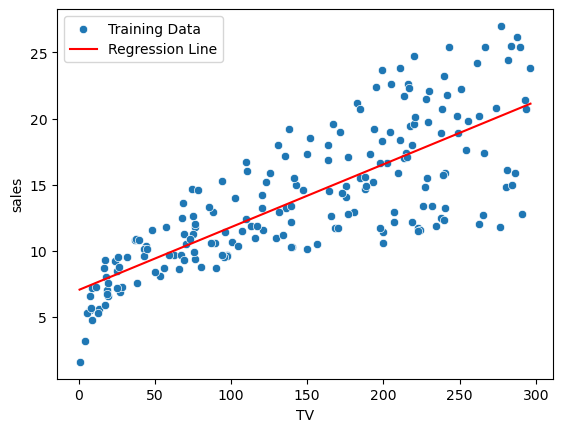

In [47]:
sns.scatterplot(data=advertising_data, x='TV', y='sales', label='Training Data')
fitted_values = model.predict(X)
sns.lineplot(data=advertising_data, x='TV', y=fitted_values, color='red', label='Regression Line')